# Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

# Requisiti del progetto

## Fasi del Progetto

### Preparazione del Dataset
- Caricamento e preprocessamento dei dati sui prezzi immobiliari.
- Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

### Implementazione dei Modelli di Regressione
- **Ridge Regression:** Implementazione e addestramento del modello con regolarizzazione Ridge.
- **Lasso Regression:** Implementazione e addestramento del modello con regolarizzazione Lasso.
- **Elastic Net Regression:** Implementazione e addestramento del modello con regolarizzazione Elastic Net.

### Valutazione delle Performance
- Utilizzo di tecniche di validazione incrociata.
- Calcolo del **Mean Squared Error (MSE)** per ciascun modello.
- Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
- Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

### Visualizzazione dei Risultati
- Creazione di grafici per visualizzare e confrontare le performance dei modelli.
- Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

## Il Dataset

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile - continuous
* Bedrooms: numero di camere da letto - continuous
* Bathrooms: numero di bagni - continuous
* Stories: numero di piani - continuous
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti - ohe
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti - ohe
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti - ohe
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti - ohe
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti - ohe
* parking: numero di parcheggi - ordinal
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti - ohe
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato - ordinal

# Implementazione

Il progetto implementa un'analisi avanzata per il **mercato immobiliare**, con l'obiettivo di prevedere i prezzi delle proprietà utilizzando modelli di regressione e tecniche di regolarizzazione.

## Importazione e gestione dei prerequisiti e delle dipendenze

Descrizione

In [1]:
# Dependencies

# General

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Scikit Learn Models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Scikit Learn Metrics

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sns.set_theme(style="whitegrid")

## Importazione del Dataset

Il dataset rappresenta un insieme di osservazioni di unità immobiliari. Il dataset traccia alcune features caratteristiche di un immobile, come:

* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

e ne traccia il relativo prezzo, che è la nostra variabile target.

Non potendo contare su una conoscenza di dominio specifica e non potendo effettuare ulteriori analisi sui dati, i dati verranno analizzati direttamente come forniti. Di seguito carichiamo il dataset e ne mostriamo un estratto:

In [2]:
df = pd.read_csv('data/housing.csv')

df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


In [31]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


## Preparazione del dataset

Verranno immediatamente applicate alcune tecniche di riduzione della dimensionalità, come la feature selection tramite matrice di correlazione. Questo ci consentirà di rimuovere dati superflui e poco informativi.

Le features sono tutte di tipo numerico, e sono quindi confrontabili direttamente tramite coefficiente di Pearson:

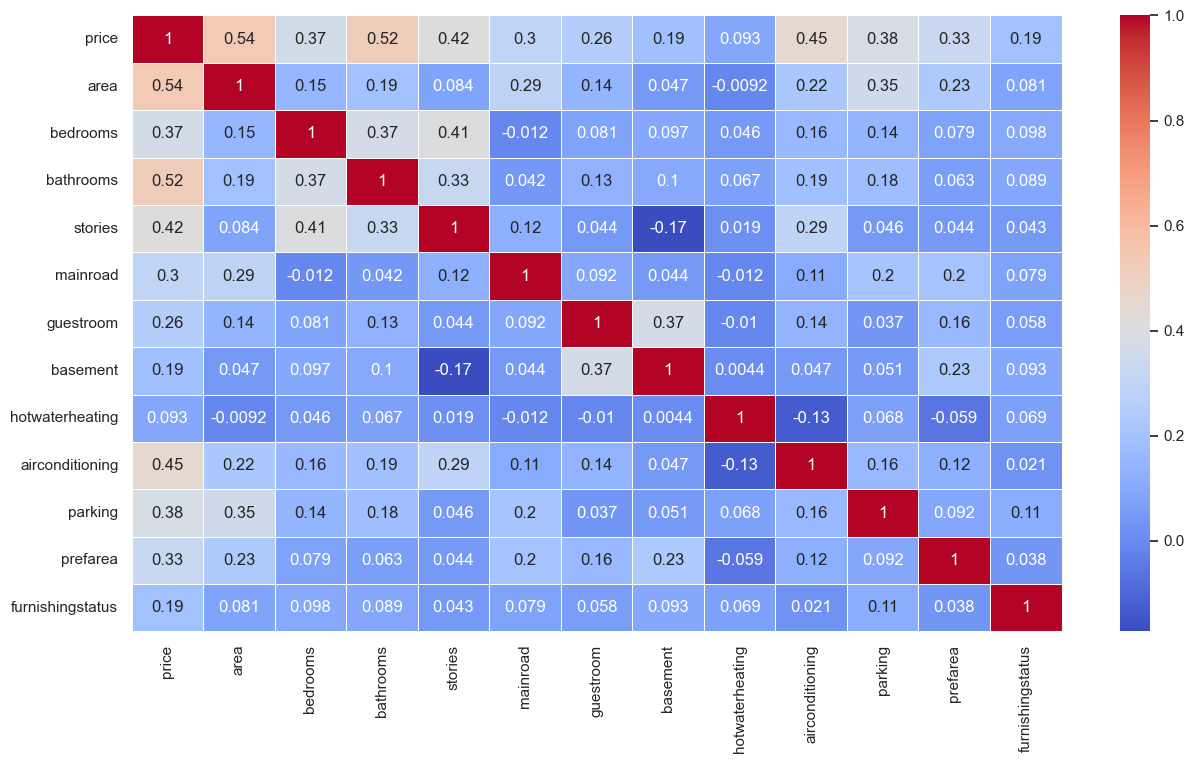

In [27]:
# Feature Correlation Analysis for numerical variables

plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(method="pearson"), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Dall'analisi della matrice sopra mostrata, le features sembrano avere quasi tutte un impatto quantomeno discreto sul target. 

Fa eccezione la feature "hotwaterheating", che possiede una *bassa* correlazione non solo con il prezzo, ma anche con le altre. Considerando che, almeno usualmente, se l'immobile non possiede una caldaia il riscaldamento è di tipo centralizzato (influendo poco sul prezzo di acquisto/affitto), essa viene rimossa dal dataset:

In [28]:
df = df.drop(['hotwaterheating'], axis=1)

Verranno effettuati ulteriori passaggi di feature selection più avanti, tramite regolarizzazione post-fitting dei modelli di regressione che verranno prodotti.

### Analisi dei valori NA e Null del dataset

Viene ora effettuata un'analisi sui dati mancanti: 

In [30]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Dati i risultati della funzione isna() di Pandas, si può affermare che il dataset non ne riporta. Non è quindi necessario effettuare imputazioni o rimozioni di features/osservazioni particolari.

### Train-test Split

Per evitare il data leakage, prima di qualsiasi modifica ai dati del dataset, viene effettuato un passaggio di Hold-Out per separare il train set dal test set.

In [32]:
X = df.drop('price', axis = 1)
y = df['price']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)